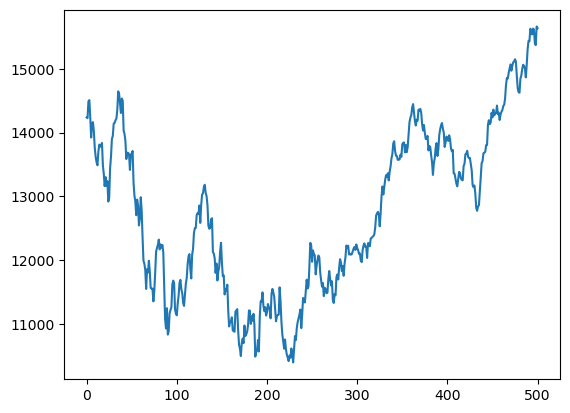

In [2]:
# #graphing nasdaq data
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time



df = pd.read_csv("nasdaq_2years.csv")

fig, ax = plt.subplots() 


days = []
for i in range(len(df["Date"])):
    days.append(i)
df.insert(0, "Days", days, True)

x = df["Days"]
y = df["High"]



ax.plot(x, y)
#ax.set_xscale("linear")


plt.show()




In [11]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import BayesianRidge, LinearRegression


X_train, X_valid, y_train, y_valid = train_test_split(df["Days"], df["High"], train_size=0.8, test_size=0.2, random_state=0)



X_train = np.array(X_train)
y_train = np.array(y_train)


X_valid = np.array(X_valid)
y_valid = np.array(y_valid)



lin = LinearRegression(n_jobs= 30)
lin.fit(X_train.reshape(-1, 1), y_train)

bay = BayesianRidge(n_iter=30)
bay.fit(X_train.reshape(-1, 1), y_train)

pred = lin.predict(X_valid.reshape(-1,1))

pred_bay = bay.predict(X_valid.reshape(-1, 1))


print(lin.score(X_valid.reshape(-1,1), y_valid))
print(bay.score(X_valid.reshape(-1, 1), y_valid))


0.21574987796977285
0.21528549384910978


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


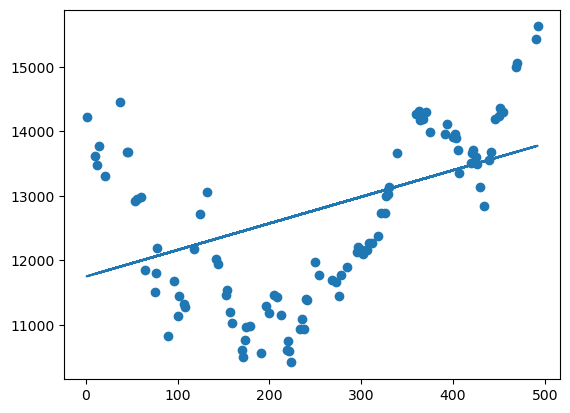

In [10]:
fig, ax = plt.subplots() 
ax.plot(X_valid, pred_bay)
ax.scatter(X_valid, y_valid)
plt.show()